<h1><center>Минимизация удельных магнитных потерь стали</center></h1>
<h2><center>Предварительная обработка данных</center></h2>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 5)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/dataset.csv', decimal=',')

In [3]:
df.head()

,Индекс,Номер партии,Номер партии_АСУТП,Номер плавки,Номер рулона,Длина_1,Длина_2,Длина_3,Длина_4,Длина_5,Углерод_начало,Длина_Обезуглероживание,Толщина_средняя,Длина_ГП,Длина_МС,Длина_Н,Азот_конец,Азот_начало,Азот_среднее,Кислород_начало,N,Al,Номер_бригады,Поступление_в_технологическую_секцию,Выезд_из_технологической_секции,Длина__м,ЗВО,CO_Этап2_зона1,CO_Этап2_зона2,CO_Этап2_зона3,CO_Этап2_зона4,CO2_Этап1,Калиброванное_значение_CO2_Этап2_зона4,Si,Mn,Cu,NH3_Этап3_зона3,T_Этап3_зона4,Настройка_датчика_CO2_Этап2_зона4,Ni,Кислород_конец,Кислород_среднее,Sn,Средние_магнитные_потери,Коэффициент_свойств_стали,S,Датчик_механических_свойств,Углерод_конец,H2_Этап3_зона3,Скорость_технологической_секции,H2_Этап4_зона1,H2_Этап2_зона1,H2_Этап2_зона2,H2_Этап2_зона3,H2_Этап2_зона4,H2_Этап3_зона1,H2_Этап3_зона2,NH3_Этап3_зона1,NH3_Этап3_зона2,CO_Этап2_зона5,T_Этап1_зона6,Углерод_среднее,Т_Этап5_зона1,Т_Этап5_зона2,Т_Этап4_зона1,Т_Этап4_зона2,T_Этап1_зона1,T_Этап1_зона2,T_Этап1_зона3,T_Этап1_зона4,T_Этап1_зона5,T_Этап2_зона1,T_Этап2_зона2,T_Этап2_зона3,T_Этап2_зона4,T_Этап2_зона5,T_Этап2_зона6,T_Этап2_зона7,T_Этап3_зона1,T_Этап3_зона2,T_Этап3_зона3,T_в_начале_нормализации,T_в_середине_нормализации_1,T_в_середине_нормализации_2,T_в_конце_нормализации,T_проход_1,T_проход_3,T_проход_5,T_проход_2,T_проход_4,Температура_полосы_на_выходе_реверсивного стана,ШОС,Ti,Длина_Азотирование,Толщина_МС,Точка_росы_Этап4_зона1,Точка_росы_Этап2_зона2,Точка_росы_Этап2_зона3,T_за_средней_клетью,T_конца_проката,T_рулона,Тренд_температуры_перед_реверсивным_станом,Толщина_перед_смоткой,C,Удельные_потери,Начало непрерывного отжига,Окончание непрерывного отжига,F,Cr,Водород_начало,Водород_среднее,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,H2_Этап1,CO2_Этап2_зона1,CO2_Этап2_зона3
0,0,522350,580797,1717428,70,23.28,2214.0,55.60000,5111.88000,121.76000,0.0027,121.12000,25,46.32,120,25.2,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,NaN,0.01600,3.5,1.73,1.15,0.46,0.21,0.11,-0.02000,3.315,0.14,0.01,0.15012,309,0.00000,0.01,0.0875,0.08925,0.003,1.04,1,0.005,35.80168,0.0025,0.10204,68.0,51.69,69.17,68.23,65.46,53.39,36.0,18.70496,0.03,0.96,1.57069,0,0.0026,747.84448,745.99000,839.96000,839.57552,930.18000,929.64000,909.09992,900.04120,868.47,839.90224,839.90000,840.42208,839.81000,839.19776,839.52224,839.32560,770.44,769.47112,771.61576,1097.4032,1098.0032,1091.0952,902.1128,135.69117,181.60561,199.75004,178.91038,191.52730,100,Melubir 6736/LI,0.002,3560,0.287,-19.86000,61.00448,59.75328,948.368,922.78705,593.18438,364,"тренд 2,3",0.055,1.072,NaN,2017-08-01 14:07:58,0.024,0.11,2.4,1.7,1.22,69.7,NaN,63.68000,NaN,1.6,69.75,0.1,0.06
1,1,522350,580797,1717428,70,25.22,2211.0,60.23333,5104.95333,131.90667,0.0027,131.21333,25,47.68,130,27.3,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,2017-08-01 14:07:58,0.01733,3.5,1.73,1.15,0.46,0.21,0.11,0.82147,3.315,0.14,0.01,0.75690,25,0.84147,0.01,0.0875,0.08925,0.003,1.04,1,0.005,42.80209,0.0025,0.10204,68.0,51.69,69.17,68.23,65.46,53.39,36.0,14.92540,0.03,0.96,1.57050,0,0.0026,747.88000,745.99243,839.96243,839.53879,930.17757,929.64000,909.02000,900.14577,868.47,839.92121,839.90849,840.28485,839.81000,839.18121,839.5242266667,839.35908,770.44,769.48849,771.83092,1097.4368,1098.0368,1091.0448,902.2472,136.56210,183.54778,200.21433,179.18122,193.17510,100,Melubir 6736/LI,0.002,3680,0.288,-19.86000,61.03515,59.69029,948.232,922.81295,591.21562,364,"тренд 2,3",0.055,1.087,NaN,NaN,0.024,0.11,2.7,1.9,1.22,70.8,NaN,63.68000,NaN,1.6,69.75,0.1,0.06
2,2,522350,580797,1717428,70,27.16,2208.0,64.86667,5098.02667,142.05333,0.0027,141.30667,25,49.04,140,29.4,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,2017-08-01 14:07:58,0.01867,3.5,1.73,1.15,0.46,0.21,0.11,0.88930,3.315,0.14,0.01,0.14955,290,0.90930,0.01,0.0875,0.08925,0.003,1.04,1,0.005,49.01099,0.0025,0.10204,68.0,51.69,69.17,68.23,65.46,53.39,36.0,9.39301,0.03,0.96,1.57033,0,0.0026,747.88261,

<br /><b>Порядковые и индексные колонки удаляем:</b>

In [4]:
df.drop(columns=[
    'Индекс', 
    'Номер партии', 
    'Номер партии_АСУТП', 
    'Номер плавки', 
    'Номер рулона', 
    'Номер_бригады'
], inplace=True)

<br>



## 1. Пропуски в данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Columns: 114 entries, Длина_1 to CO2_Этап2_зона3
dtypes: float64(98), int64(8), object(8)
memory usage: 11.1+ MB


<b>Имеем 98+8=106 количественных фич и 8 категориальных/текстовых/временных фич.</b>

<b>Найдем фичи с пропусками в данных:</b>

In [6]:
df[df.columns[df.isna().any()].tolist()].head(10)

,Поступление_в_технологическую_секцию,Выезд_из_технологической_секции,Начало непрерывного отжига,Окончание непрерывного отжига,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2
0,2017-08-01 13:23:14,NaN,NaN,2017-08-01 14:07:58,NaN,63.68000,NaN,1.60000
1,2017-08-01 13:23:14,2017-08-01 14:07:58,NaN,NaN,NaN,63.68000,NaN,1.60000
2,2017-08-01 13:23:14,2017-08-01 14:07:58,NaN,NaN,NaN,63.67869,NaN,1.60000
3,2017-08-01 13:23:14,2017-08-01 14:07:58,NaN,NaN,NaN,63.66860,NaN,1.60000
4,NaN,2017-08-01 14:07:58,2017-08-01 13:23:14,NaN,NaN,63.65851,NaN,1.60000
5,NaN,2017-08-01 14:07:58,2017-08-01 13:23:14,NaN,NaN,63.65000,NaN,1.60000
6,2017-08-01 13:23:14,2017-08-01 14:07:58,NaN,NaN,NaN,63.65504,NaN,1.59832
7,NaN,2017-08-01 14:07:58,2017-08-01 13:23:14,NaN,NaN,63.68887,NaN,1.58823
8,2017-08-01 13:23:14,2017-08-01 14:07:58,NaN,NaN,NaN,63.74307,NaN,1.58000
9,2017-08-01 13:23:14,NaN,NaN,2017-08-01 14:07:58,NaN,63.79804,NaN,1.58000


### 1.1 Временные фичи с пропусками

<b>Поступление\_в_технологическую_секцию, 
Выезд_из_технологической_секции, 
Начало непрерывного отжига, 
Окончание непрерывного отжига</b>

Эти колонки заполнены не полность, имеют много пропусков. Для первых экспериментов их придется удалить.
Необходимо уточнить на производстве почему они заполнены с пропусками? Возможно ли их заполнить из других источников? Время нахождения в технологической секции и время отжига могли бы оказаться значимыми фичами.

In [7]:
df.drop(columns=[
    'Поступление_в_технологическую_секцию', 
    'Выезд_из_технологической_секции', 
    'Начало непрерывного отжига',
    'Окончание непрерывного отжига'
], inplace=True)

### 1.2 Числовые фичи с пропусками

<b>Точка_росы_Этап1_зона1, Точка_росы_Этап1_зона2, CO_Этап1_зона1, CO_Этап1_зона2</b>

Эти колонки заполнены не полность, имеют много пропусков. Необходимо уточнить на производстве почему они заполнены с пропусками? Возможно ли их заполнить из других источников? Допустимо ли заполнить их средними значениями?


Существует несколько способов работы с пропущенными значениями:

1. Удалить строки с пропусками.
2. Заполнение нулями или средними/медианой/модой.
3. Введение индикаторных переменных.
4. Заполение пропусков на базе ML моделей.

Лучшим способом является заполение пропусков на базе ML моделей так как с большой вероятностью он не меняет распределение признака. В данном примере для простоты мы заполним пропуски медианными значениями.


In [8]:
# Можно попробовать ввести индикаторные переменные.
# df["Точка_росы_Этап1_зона1_пропуск"] = np.where(df["Точка_росы_Этап1_зона1"].isna(), 1, 0)
# df["Точка_росы_Этап1_зона2_пропуск"] = np.where(df["Точка_росы_Этап1_зона2"].isna(), 1, 0)
# df["CO_Этап1_зона1_пропуск"] = np.where(df["CO_Этап1_зона1"].isna(), 1, 0)
# df["CO_Этап1_зона2_пропуск"] = np.where(df["CO_Этап1_зона2"].isna(), 1, 0)

df["Точка_росы_Этап1_зона1"].fillna(df["Точка_росы_Этап1_зона1"].median(), inplace=True)
df["Точка_росы_Этап1_зона2"].fillna(df["Точка_росы_Этап1_зона1"].median(), inplace=True)
df["CO_Этап1_зона1"].fillna(df["CO_Этап1_зона1"].median(), inplace=True)
df["CO_Этап1_зона2"].fillna(df["CO_Этап1_зона1"].median(), inplace=True)

<br><br>

## 2 Нечисловые фичи

In [9]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Кислород_конец', 'T_Этап2_зона6', 'ШОС', 'Толщина_перед_смоткой'], dtype='object')

### 2.1 Преобразуем 'Кислород_конец' и 'T_Этап2_зона6' в numeric

По какой-то причине эти признаки имеют тип 'object'. Их можно без преобразований перевести в numeric. На производстве необходимо уточнить почему есть проблема с этими признаками? Есть ли способ хранить их в виде чисел?

In [10]:
df["Кислород_конец"] =  pd.to_numeric(df["Кислород_конец"])
df["T_Этап2_зона6"] =  pd.to_numeric(df["T_Этап2_зона6"])

### 2.2 ШОС

Признак ШОС (Шлакообразующая смесь) является категориальным. Судя по всему это марка или производитель вспомогательной добавки. 

In [11]:
df["ШОС"].value_counts()

Melubir 6733/LI    3648
Melubir 6739/LI    2760
Melubir 6736/LI    2227
Melubir 6738/LI    2107
Melubir 6731/LI    2049
Name: ШОС, dtype: int64

Создадим 5 бинарных признаков с помощью метода One-hot encoder.

In [12]:
ohe = OneHotEncoder()
ohe.fit(X=df['ШОС'].values.reshape(-1, 1))
df = df.join(
    pd.DataFrame(ohe.transform(df['ШОС'].values.reshape(-1, 1)).toarray(), columns=ohe.categories_[0])
) 
df.drop(columns=['ШОС'], inplace=True)

### 2.3 Толщина_перед_смоткой

Судя по всему, признак 'Толщина_перед_смоткой' является числовым, но заполнен с ошибками. Необходимо усовершенствовать сбор и запись этого признака на производстве.

In [13]:
df[['Толщина_перед_смоткой']].head(5)

,Толщина_перед_смоткой
0,"тренд 2,3"
1,"тренд 2,3"
2,"тренд 2,3"
3,"тренд 2,3"
4,"тренд 2,3"


In [14]:
df[['Толщина_перед_смоткой']].tail(5)

,Толщина_перед_смоткой
12786,"тредн2,3112691771"
12787,"тредн2,3084518828"
12788,"тредн2,3056345886"
12789,"тредн2,3028172943"
12790,"тредн2,3"


Очистим его от текста и преобразуем в число.

In [15]:
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('трeнд.','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('тредн.','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('тренд_','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('тредн_','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('тренд','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('тредн','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace('_','')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.replace(',','.')
df["Толщина_перед_смоткой"] = df["Толщина_перед_смоткой"].str.strip()

df["Толщина_перед_смоткой"] =  pd.to_numeric(df["Толщина_перед_смоткой"])

In [16]:
df.dtypes.value_counts()

float64    106
int64        8
dtype: int64

<h4>Теперь мы имеем 118 числовых признаков.</h4>

<br><br>

## 3. Корреляция признаков

### 3.1 Корреляция в целевой переменной

In [17]:
corrMatrix = df.corr()
corrMatrix.sort_values(by=['Удельные_потери'], ascending=False)[['Удельные_потери']].head(10)

,Удельные_потери
Удельные_потери,1.00000
Средние_магнитные_потери,0.79761
Melubir 6733/LI,0.60169
F,0.48882
Al,0.47276
Коэффициент_свойств_стали,0.44707
Cr,0.38613
Азот_среднее,0.37044
Азот_начало,0.27494
Азот_конец,0.27385


In [18]:
corrMatrix.sort_values(by=['Удельные_потери'], ascending=False)[['Удельные_потери']].tail(10)

,Удельные_потери
T_конца_проката,-0.32147
T_проход_1,-0.32970
S,-0.36717
T_проход_3,-0.37623
N,-0.50757
Точка_росы_Этап1_зона1,-0.60268
Cu,NaN
Ni,NaN
H2_Этап3_зона3,NaN
T_Этап1_зона6,NaN


Видно большую корреляю с признаком <b>Средние_магнитные_потери</b> и, судя по всему, константные признаки <b>Cu, Ni, H2_Этап3_зона3, T_Этап1_зона6</b>.

### 3.2 Средние_магнитные_потери и Коэффициент_свойств_стали

Что такое <b>Средние_магнитные_потери</b> и <b>Коэффициент_свойств_стали</b>? Кажется что это очень близкое измерение того же параметра что и <b>Удельные_потери</b>. У этого признака слишком большая корреляция с целевой переменной. Необходимо выяснить это на производстве. В данной работе я предпочту удалить этот признак.

In [19]:
df.drop(columns=['Средние_магнитные_потери', 'Коэффициент_свойств_стали'], inplace=True)

### 3.3 Константные признаки

Удалим константные признаки.

In [20]:
df.drop(columns=['Cu', 'Ni', 'H2_Этап3_зона3', 'T_Этап1_зона6'], inplace=True)

### 3.4 Конец, Среднее, Начало

В данных есть признаки:<br>
<br>
Азот_конец<br>
Азот_начало<br>
Азот_среднее<br>
<br><br>
Кислород_начало<br>
Кислород_конец<br>
Кислород_среднее<br>
<br><br>
Углерод_начало<br>
Углерод_конец<br>
Углерод_среднее<br>
<br><br>
Водород_начало<br>
Водород_среднее<br>
(Водород_конец) отсутствует?<br>
<br><br>
Кажется что эти признаки избыточны. Необходимо уточнить на производстве их физический смысл. В данной работе оставим только 'среднее'.

In [21]:
df.drop(columns=[
    'Водород_начало',
    'Углерод_начало',
    'Углерод_конец',
    'Азот_начало',
    'Азот_конец',
    'Кислород_начало',
    'Кислород_конец',
], inplace=True)

### 3.5 Взаимная корреляция признаков

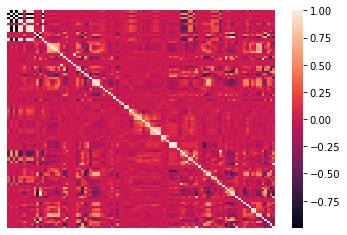

In [22]:
corrMatrix = df.drop(columns=['Удельные_потери']).corr()
sn.heatmap(df.corr(), yticklabels=False, xticklabels=False)
plt.show()

Судя по heatmap в данных есть взаимно коррелирующие признаки. <b>Удалим их.</b>

In [23]:
corr_matrix_abs = corrMatrix.abs()
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df.drop(to_drop, axis=1, inplace=True)

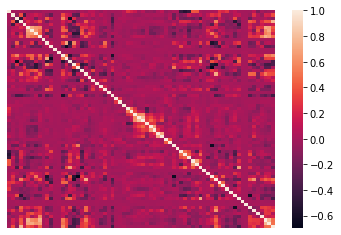

In [24]:
corrMatrix = df.drop(columns=['Удельные_потери']).corr()
sn.heatmap(df.corr(), yticklabels=False, xticklabels=False)
plt.show()

<b>Чем плоха мультиколлинеарность?</b><br>

В результате обучения линейных моделей на мультиколлинеарных данных может получится бесконечно много оптимальных алгоритмов. Многие из них будут иметь большие веса. Не все будут иметь хорошую обобщающую способность. Также осложняется интерпретация важности признаков.

<br><br>

## 4. Целевая переменная

Посмотрим на распределие целевой переменной.

<AxesSubplot:xlabel='Удельные_потери', ylabel='Density'>

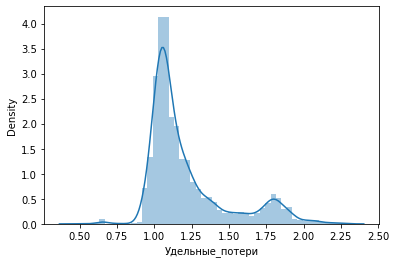

In [25]:
sn.distplot(df['Удельные_потери'])

Видим выбросы в правом хвосте гистограммы. Необходимо уточнить на производстве что известно об этом. Может был какой-то период когда шел какой-то брак? А может быть баг датчиков? А может ошибка бригады?

<b>Поскольку у нас есть некий порог качества, то мы можем преобразовать нашу задачу регрессии в задачу бинарной классификации. 
Возможно это будет наглядней.</b>

Имеет ли смысл это сделать? Пока попробуем обойтись без этого.

In [26]:
# df['target_'] = df['Удельные_потери'] < 1.1
# df['target_'] = df['target_'].astype("int")
# df.insert(0, 'target', df['target_'])
# df.drop(columns=['Удельные_потери', 'target_'], inplace=True)

# df['target'].value_counts()

# Классы целевой переменной получились сбалансированными. Думаю что для наглядности мы можем использовать метрику accuracy.

<br><br>

In [27]:
df.insert(0, 'target', df['Удельные_потери'])
df.drop(columns=['Удельные_потери'], inplace=True)

In [28]:
df

,target,Длина_1,Толщина_средняя,Азот_среднее,N,ЗВО,CO_Этап2_зона1,CO_Этап2_зона2,CO_Этап2_зона4,CO2_Этап1,Калиброванное_значение_CO2_Этап2_зона4,Si,Mn,NH3_Этап3_зона3,T_Этап3_зона4,Кислород_среднее,Sn,S,Датчик_механических_свойств,Скорость_технологической_секции,H2_Этап4_зона1,H2_Этап2_зона1,H2_Этап2_зона4,H2_Этап3_зона1,H2_Этап3_зона2,NH3_Этап3_зона1,NH3_Этап3_зона2,CO_Этап2_зона5,Углерод_среднее,Т_Этап5_зона1,Т_Этап5_зона2,Т_Этап4_зона1,T_Этап1_зона1,T_Этап1_зона2,T_Этап1_зона3,T_Этап1_зона4,T_Этап1_зона5,T_Этап2_зона1,T_Этап2_зона2,T_Этап2_зона3,T_Этап2_зона4,T_Этап2_зона5,T_Этап3_зона1,T_Этап3_зона3,T_в_начале_нормализации,T_в_конце_нормализации,T_проход_1,T_проход_3,T_проход_5,T_проход_2,T_проход_4,Ti,Длина_Азотирование,Толщина_МС,Точка_росы_Этап4_зона1,Точка_росы_Этап2_зона2,T_за_средней_клетью,T_конца_проката,T_рулона,Толщина_перед_смоткой,Водород_среднее,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,CO2_Этап2_зона1,CO2_Этап2_зона3,Melubir 6736/LI
0,1.072,23.2800,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,-0.02000,3.315,0.14,0.15012,309,0.08925,0.003,0.005,35.80168,68.0,51.69,69.17,53.39,36.00,18.70496,0.03,0.96,1.57069,0.0026,747.84448,745.99000,839.96000,930.18000,929.64000,909.09992,900.04120,868.47,839.90224,839.90000,840.42208,839.81000,839.19776,770.44000,771.61576,1097.40320,902.11280,135.69117,181.60561,199.75004,178.91038,191.52730,0.002,3560,0.287,-19.86000,61.00448,948.36800,922.78705,593.18438,2.30000,1.7,1.22,69.7,63.47742,63.68000,1.58,1.60,0.10,0.06,1.0
1,1.087,25.2200,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,0.82147,3.315,0.14,0.75690,25,0.08925,0.003,0.005,42.80209,68.0,51.69,69.17,53.39,36.00,14.92540,0.03,0.96,1.57050,0.0026,747.88000,745.99243,839.96243,930.17757,929.64000,909.02000,900.14577,868.47,839.92121,839.90849,840.28485,839.81000,839.18121,770.44000,771.83092,1097.43680,902.24720,136.56210,183.54778,200.21433,179.18122,193.17510,0.002,3680,0.288,-19.86000,61.03515,948.23200,922.81295,591.21562,2.30000,1.9,1.22,70.8,63.47742,63.68000,1.58,1.60,0.10,0.06,1.0
2,1.070,27.1600,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,0.88930,3.315,0.14,0.14955,290,0.08925,0.003,0.005,49.01099,68.0,51.69,69.17,53.39,36.00,9.39301,0.03,0.96,1.57033,0.0026,747.88261,746.02568,839.98000,930.14955,929.63347,909.02131,900.27045,868.47,839.93653,839.97131,840.33307,839.81000,839.19653,770.44000,771.91392,1097.47040,902.38160,135.84434,183.52360,203.10431,179.27150,194.33072,0.002,4052,0.286,-19.86000,60.99739,948.09600,922.83886,589.24686,2.30000,2.2,1.25,69.9,63.47742,63.67869,1.58,1.60,0.10,0.06,1.0
3,1.075,29.1000,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,0.12112,3.315,0.14,0.99482,231,0.08925,0.003,0.005,47.76400,68.0,51.69,69.17,53.39,36.00,19.39390,0.03,0.96,1.57071,0.0026,747.91260,746.14680,839.97720,930.05480,929.58860,909.02300,900.34140,868.47,839.97300,839.99960,840.41020,839.79180,839.24000,770.44000,771.96100,1097.50400,902.51600,135.12658,183.78471,205.98112,179.27150,196.10320,0.002,4576,0.286,-19.83760,60.98140,948.00000,922.77619,587.41619,2.30000,1.5,2.81,69.1,63.47742,63.66860,1.58,1.60,0.10,0.06,1.0
4,1.064,31.0400,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,-0.77680,3.315,0.14,-0.97655,235,0.08925,0.003,0.005,47.89488,68.0,51.69,69.17,53.39,36.00,21.80116,0.03,0.96,1.57064,0.0026,747.99597,746.25896,839.96896,929.89403,929.58597,908.98000,900.35000,868.47,839.95688,840.13493,840.33805,839.69344,839.23851,770.44000,772.08104,1097.53760,902.65040,135.65801,185.73150,208.78339,179.78672,198.51690,0.002,2090,0.285,-19.68059,60.98701,948.00000,922.50095,585.91695,2.30000,1.2,1.49,71.9,63.47742,63.65851,1.58,1.60,0.10,0.06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,1.139,1407.1060,23,0.0235,0.0075,4.0,1.

<br><br>

## 5. Сохранение

In [29]:
df.to_csv('./data/preprocessed_data.csv', index=False)